In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
data = pd.read_csv('data.csv', sep = ';')
data.head()

,Id,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
0,1,RL,9600,6,1976,Ex,2,3,4,6,1,2,181500
1,2,RL,14115,5,1993,Ex,1,1,2,5,0,2,143000
2,3,RL,11200,5,1965,Ex,1,3,4,5,0,1,129500
3,4,RL,12968,5,1962,TA,1,2,3,4,0,1,144000
4,5,RL,10920,6,1960,TA,1,2,3,5,1,1,157000


In [24]:
(lines, columns) = data.shape
print(f'The number of observations for the data collection:{lines}')
print(f'The number of variables for the data collection:{columns}')

The number of observations for the data collection:629
The number of variables for the data collection:13


In [25]:
data.isna().sum()

Id                      0
Zona                    0
Area                    0
Qualidade               0
AnoConstrucao           0
QualidadeAquecimento    0
Banheiros               0
Quartos_t1              0
Quartos_t2              0
Comodos                 0
Lareiras                0
Garagem                 0
Preco                   0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    629 non-null    int64 
 1   Zona                  629 non-null    object
 2   Area                  629 non-null    int64 
 3   Qualidade             629 non-null    int64 
 4   AnoConstrucao         629 non-null    int64 
 5   QualidadeAquecimento  629 non-null    object
 6   Banheiros             629 non-null    int64 
 7   Quartos_t1            629 non-null    int64 
 8   Quartos_t2            629 non-null    int64 
 9   Comodos               629 non-null    int64 
 10  Lareiras              629 non-null    int64 
 11  Garagem               629 non-null    int64 
 12  Preco                 629 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 64.0+ KB


In [27]:
sns.set_palette('Blues_d')
sns.set_style('darkgrid')

Text(0.0, 1.0, 'House prices histogram')

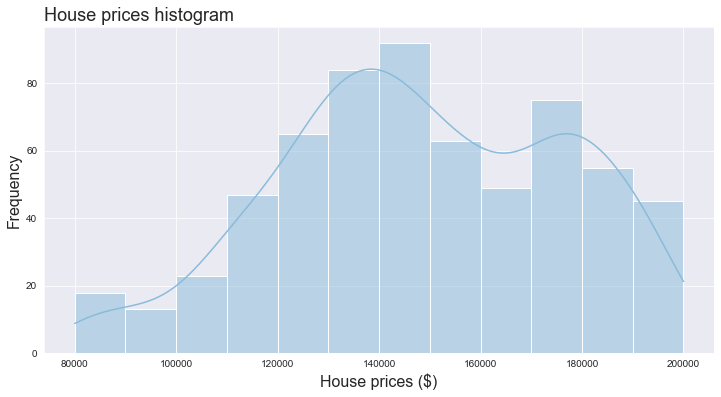

In [28]:
histogram_price = sns.histplot(data = data, x = 'Preco', kde = True)
histogram_price.figure.set_size_inches(12,6)
histogram_price.set_xlabel('House prices ($)', fontsize = 16)
histogram_price.set_ylabel('Frequency', fontsize = 16)
histogram_price.set_title('House prices histogram', fontsize = 18, loc = 'left')

Text(0.0, 1.0, 'House prices boxplot')

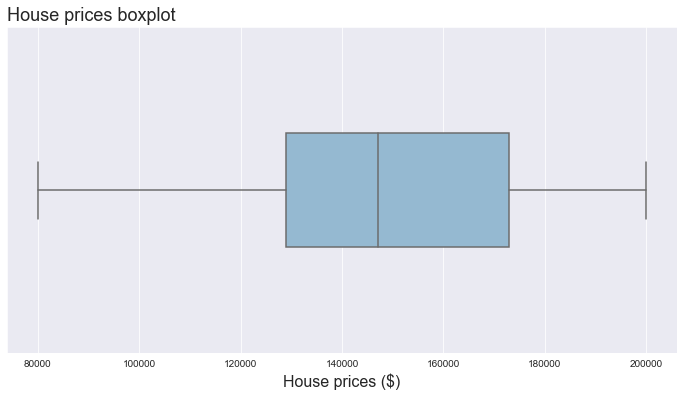

In [29]:
boxplot_price = sns.boxplot(data = data, x = 'Preco', orient = 'h', width = 0.35)
boxplot_price.figure.set_size_inches(12,6)
boxplot_price.set_xlabel('House prices ($)', fontsize = 16)
boxplot_price.set_ylabel('', fontsize = 16)
boxplot_price.set_title('House prices boxplot', fontsize = 18, loc = 'left')

In [30]:
data.describe()

,Id,Area,Qualidade,AnoConstrucao,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,8932.025437,5.642289,1974.421304,1.370429,2.651828,3.651828,5.782194,0.515103,1.608903,148234.538951
std,181.72094,3318.885535,0.892748,19.189939,0.483304,0.551129,0.551129,1.039936,0.601361,0.577980,28088.037518
min,1.00000,1300.000000,4.000000,1940.000000,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,80000.000000
25%,158.00000,7420.000000,5.000000,1959.000000,1.000000,2.000000,3.000000,5.000000,0.000000,1.000000,129000.000000
50%,315.00000,9000.000000,6.000000,1971.000000,1.000000,3.000000,4.000000,6.000000,0.000000,2.000000,147000.000000
75%,472.00000,10530.000000,6.000000,1993.000000,2.000000,3.000000,4.000000,6.000000,1.000000,2.000000,173000.000000
max,629.00000,19900.000000,8.000000,2009.000000,2.000000,3.000000,4.000000,8.000000,2.000000,3.000000,200000.000000
